In [12]:
import numpy as np

# visnav
data_path = "./data/VisNav_VR_Expt/LateralVRDataset/"
spikes_path = f"{data_path}/NF_1.5/spikerates_dt_0.01.npy"
speed_path = f"{data_path}/NF_1.5/behavior_speed_dt_0.05.npy"
stim_path = f"{data_path}/NF_1.5/stimulus.npy"
phi_path = f"{data_path}/NF_1.5/phi_dt_0.05.npy"
th_path = f"{data_path}/NF_1.5/th_dt_0.05.npy"

data = dict()
data['spikes'] = np.load(spikes_path)
data['speed'] = np.load(speed_path)
data['stimulus'] = np.load(stim_path)
data['phi'] = np.load(phi_path)
data['th'] = np.load(th_path)

In [13]:
data['spikes'].shape

(2023, 150578)

In [14]:
data['spikes'].max()

np.int8(51)

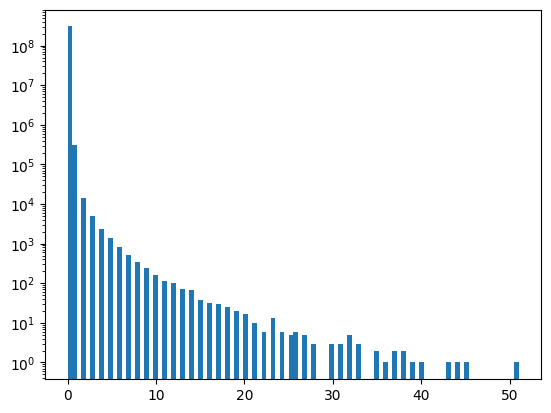

In [67]:
# plot the distribution of spike rates
import matplotlib.pyplot as plt
plt.hist(data['spikes'].flatten(), bins=100)
plt.yscale('log')

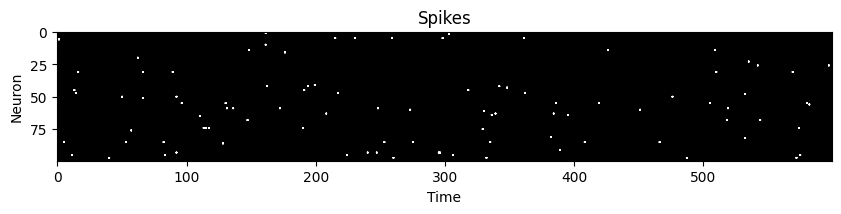

In [15]:
# plot spikes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
plt.imshow(data['spikes'][:100, :600], cmap='gray', vmin=0, vmax=0.1)
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('Spikes')
plt.show()


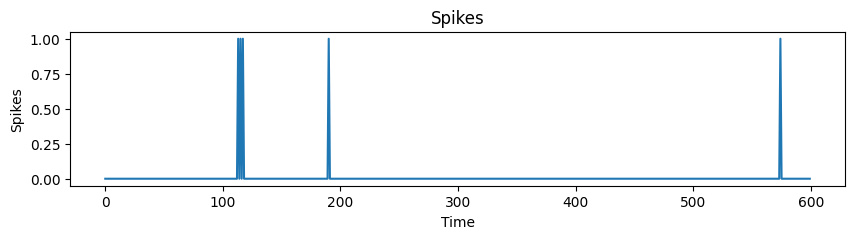

In [16]:
plt.figure(figsize=(10, 2))
plt.plot(data['spikes'][74, :600])
plt.xlabel('Time')
plt.ylabel('Spikes')
plt.title('Spikes')
plt.show()

In [59]:
intervals = np.arange(0, data['spikes'].shape[1] * 0.01, 0.05)

In [60]:
len(intervals)

30116

In [65]:
intervals

array([0.00000e+00, 5.00000e-02, 1.00000e-01, ..., 1.50565e+03,
       1.50570e+03, 1.50575e+03])

In [8]:
def split_data_by_interval(intervals, r_split=0.8, r_split_ft=0.1):
    chosen_idx = np.random.choice(len(intervals), int(len(intervals) * r_split))
    train_intervals = intervals[chosen_idx]
    # create a mask of chosen indices
    
    test_intervals = intervals[~chosen_idx]
    finetune_intervals = np.array(train_intervals[:int(len(train_intervals) * r_split_ft)])
    return train_intervals, test_intervals, finetune_intervals

In [61]:
train_intervals, test_intervals, finetune_intervals = split_data_by_interval(intervals, r_split=0.8, r_split_ft=0.01)

In [62]:
len(train_intervals), len(test_intervals), len(finetune_intervals)

(24092, 24092, 240)

In [51]:
chosen_idx = np.arange(0, len(intervals))
# shuffle the indices
np.random.shuffle(chosen_idx)
chosen_idx = chosen_idx[:int(len(intervals) * 0.8)]
chosen_idx_mask = np.zeros(len(intervals), dtype=bool)
chosen_idx_mask[chosen_idx] = True

In [52]:
len(chosen_idx)

24092

In [53]:
len(chosen_idx_mask)

30116

In [55]:
# select train and test intervals
train_intervals = intervals[chosen_idx_mask]
# take the rest as test intervals (do not use tilde)
test_intervals = intervals[~chosen_idx_mask]

In [58]:
train_intervals.shape, test_intervals.shape

((24092,), (6024,))

In [59]:
len(chosen_idx) / len(intervals)

0.7999734360472839

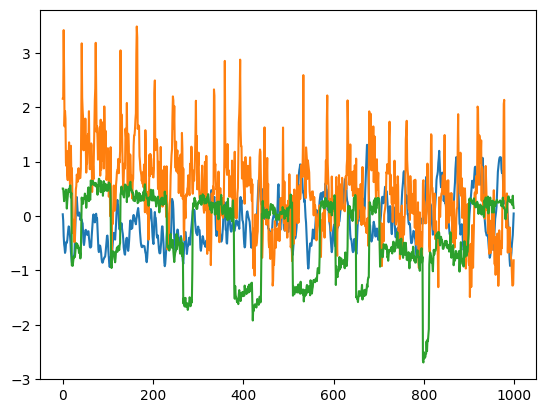

In [63]:
import matplotlib.pyplot as plt
plt.plot(data['speed'][:1000])
plt.plot(data['phi'][:1000])
plt.plot(data['th'][:1000])
plt.show()

In [10]:
data['stimulus'].shape

(30117, 30, 100)

In [64]:
data['spikes'].shape

(2023, 150578)

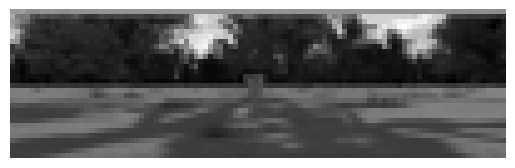

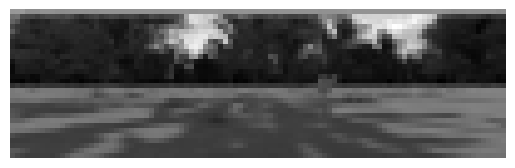

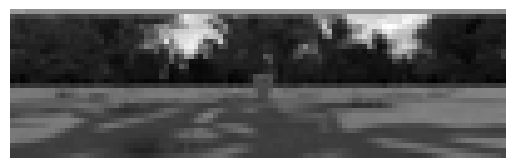

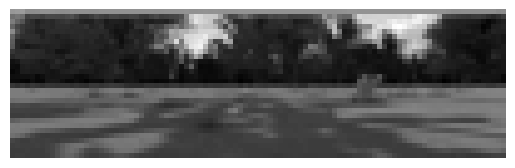

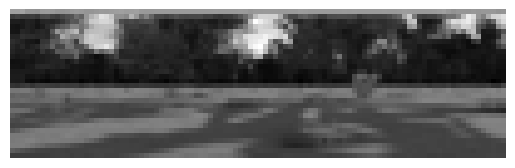

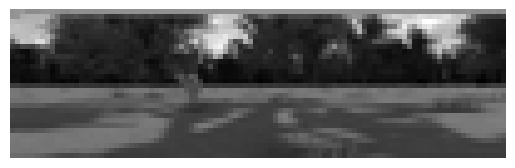

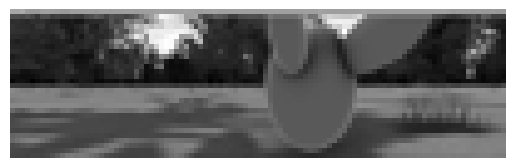

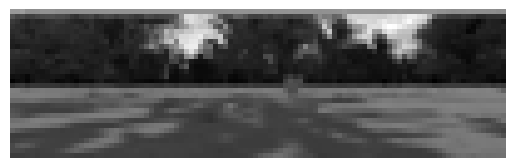

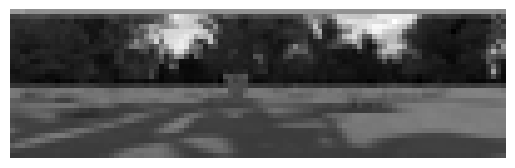

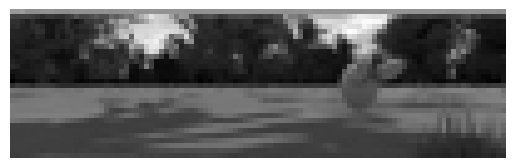

In [18]:
import matplotlib.pyplot as plt
# plot 10 random frames
for i in range(10):
    plt.figure()
    plt.imshow(data['stimulus'][np.random.randint(0, len(data['stimulus']))], cmap='gray')
    plt.axis('off')
    plt.show()